In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

rng = np.random.RandomState(42)
#plt.style.use('dark_background')

Import Data frame

In [3]:
wine_df = pd.read_csv("DS\wine.csv")

Ammount of Wines in each class

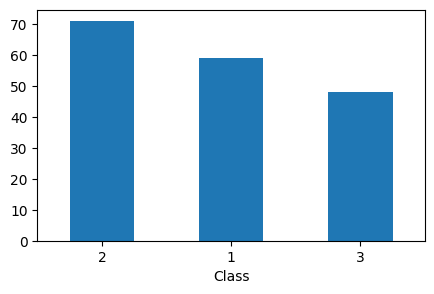

Class
2    71
1    59
3    48
Name: count, dtype: int64

In [4]:
plt.figure(figsize=(5,3))
wine_df["Class"].value_counts().plot(kind='bar')
plt.xticks(rotation=0)
plt.show()
wine_df['Class'].value_counts()

Feature distribution based on class

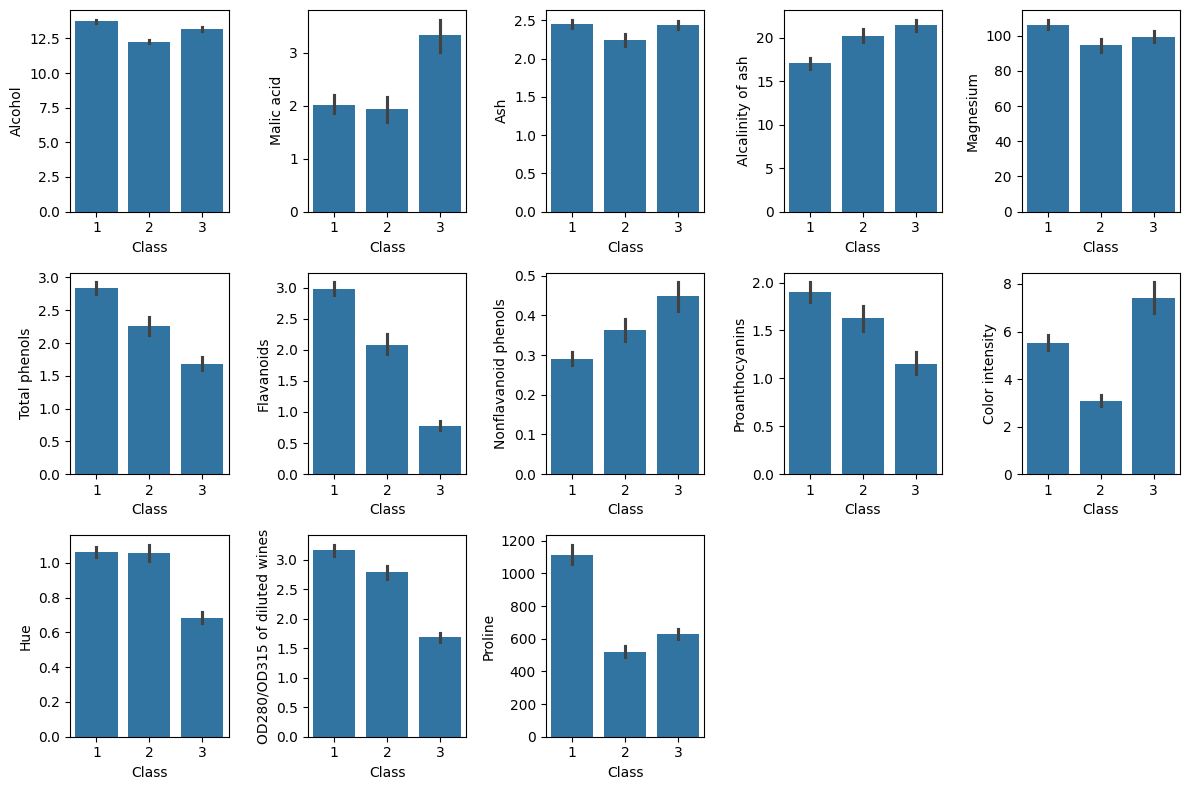

In [5]:
plt.figure(figsize=(12,8))
l=["Alcohol","Malic acid","Ash","Alcalinity of ash","Magnesium","Total phenols","Flavanoids","Nonflavanoid phenols","Proanthocyanins","Color intensity","Hue","OD280/OD315 of diluted wines","Proline"]
for i in l:
    plt.subplot(3, 5, l.index(i) + 1) 
    sns.barplot(x=wine_df["Class"],y=wine_df[i])
plt.tight_layout()
plt.show()

Feature distribution

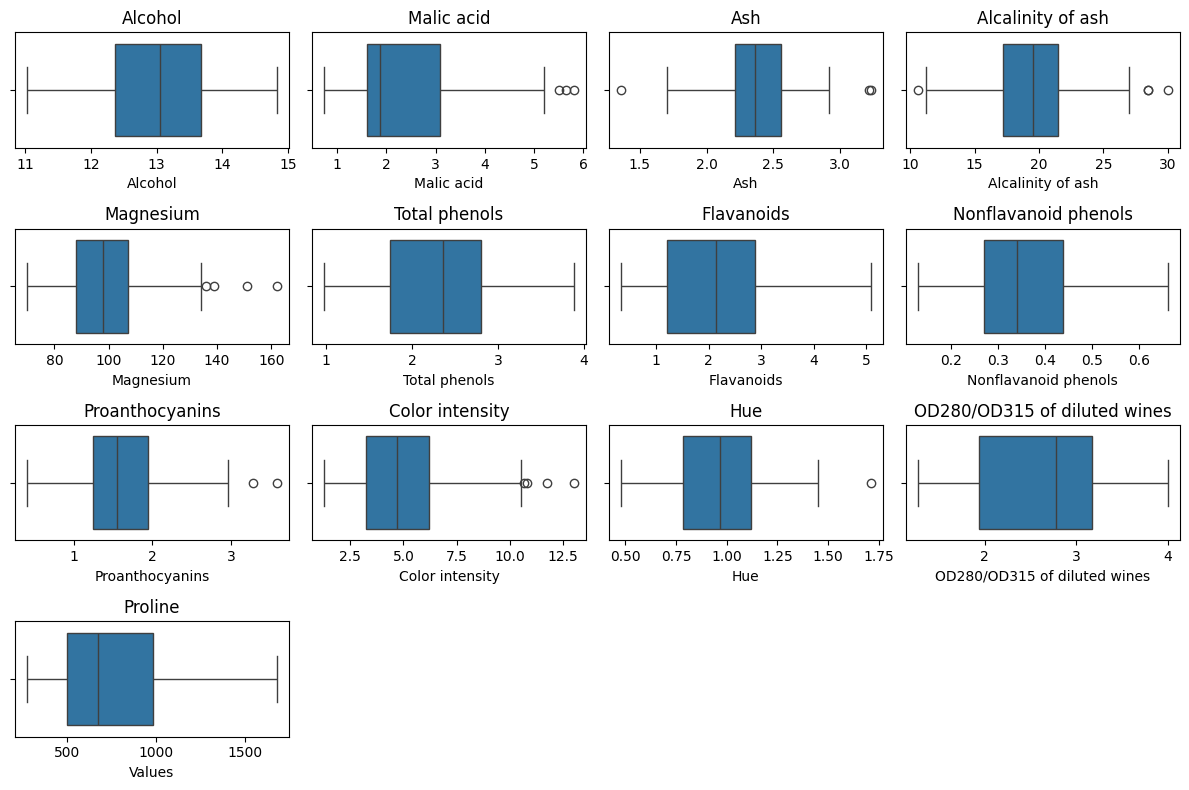

In [6]:
plt.figure(figsize=(12,8))
for i in l:
    plt.subplot(4, 4, l.index(i) + 1) 
    sns.boxplot(data=wine_df[i], orient='h')
    plt.title(i)
plt.tight_layout()
plt.xlabel('Values')
plt.show()

Correlation Heatmap

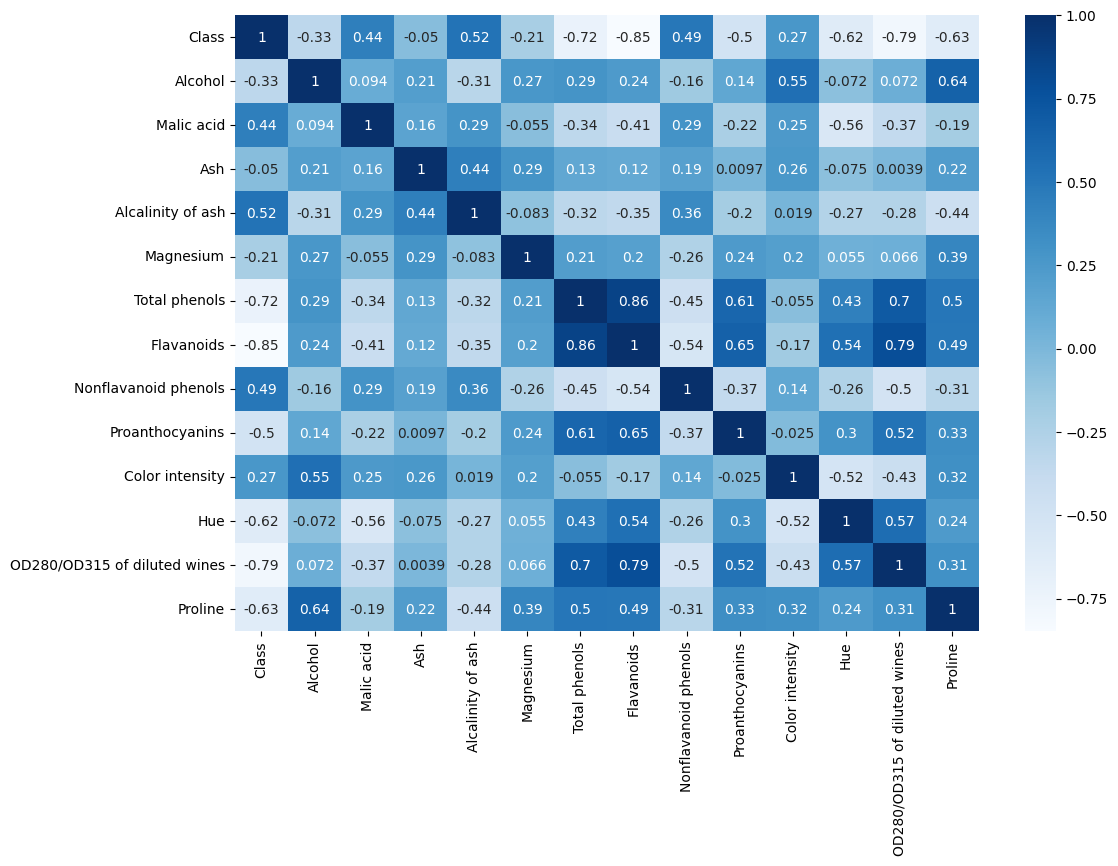

In [7]:
plt.figure(figsize=(12, 8))
cor=wine_df.corr()
sns.heatmap(cor,annot=True, cmap= "Blues")
plt.show()

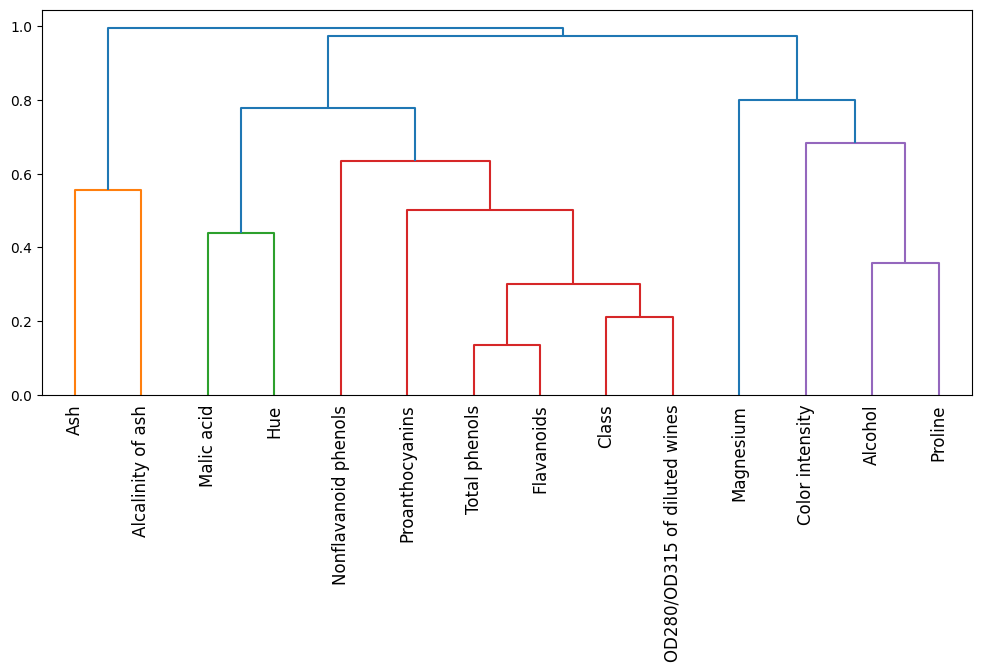

In [8]:
from scipy.cluster.hierarchy import linkage, dendrogram, fcluster
from scipy.spatial.distance import squareform

plt.figure(figsize=(12,5))
dissimilarity = 1 - abs(cor)
Z = linkage(squareform(dissimilarity), 'complete')

dendrogram(Z, labels=wine_df.columns, orientation='top', 
           leaf_rotation=90);

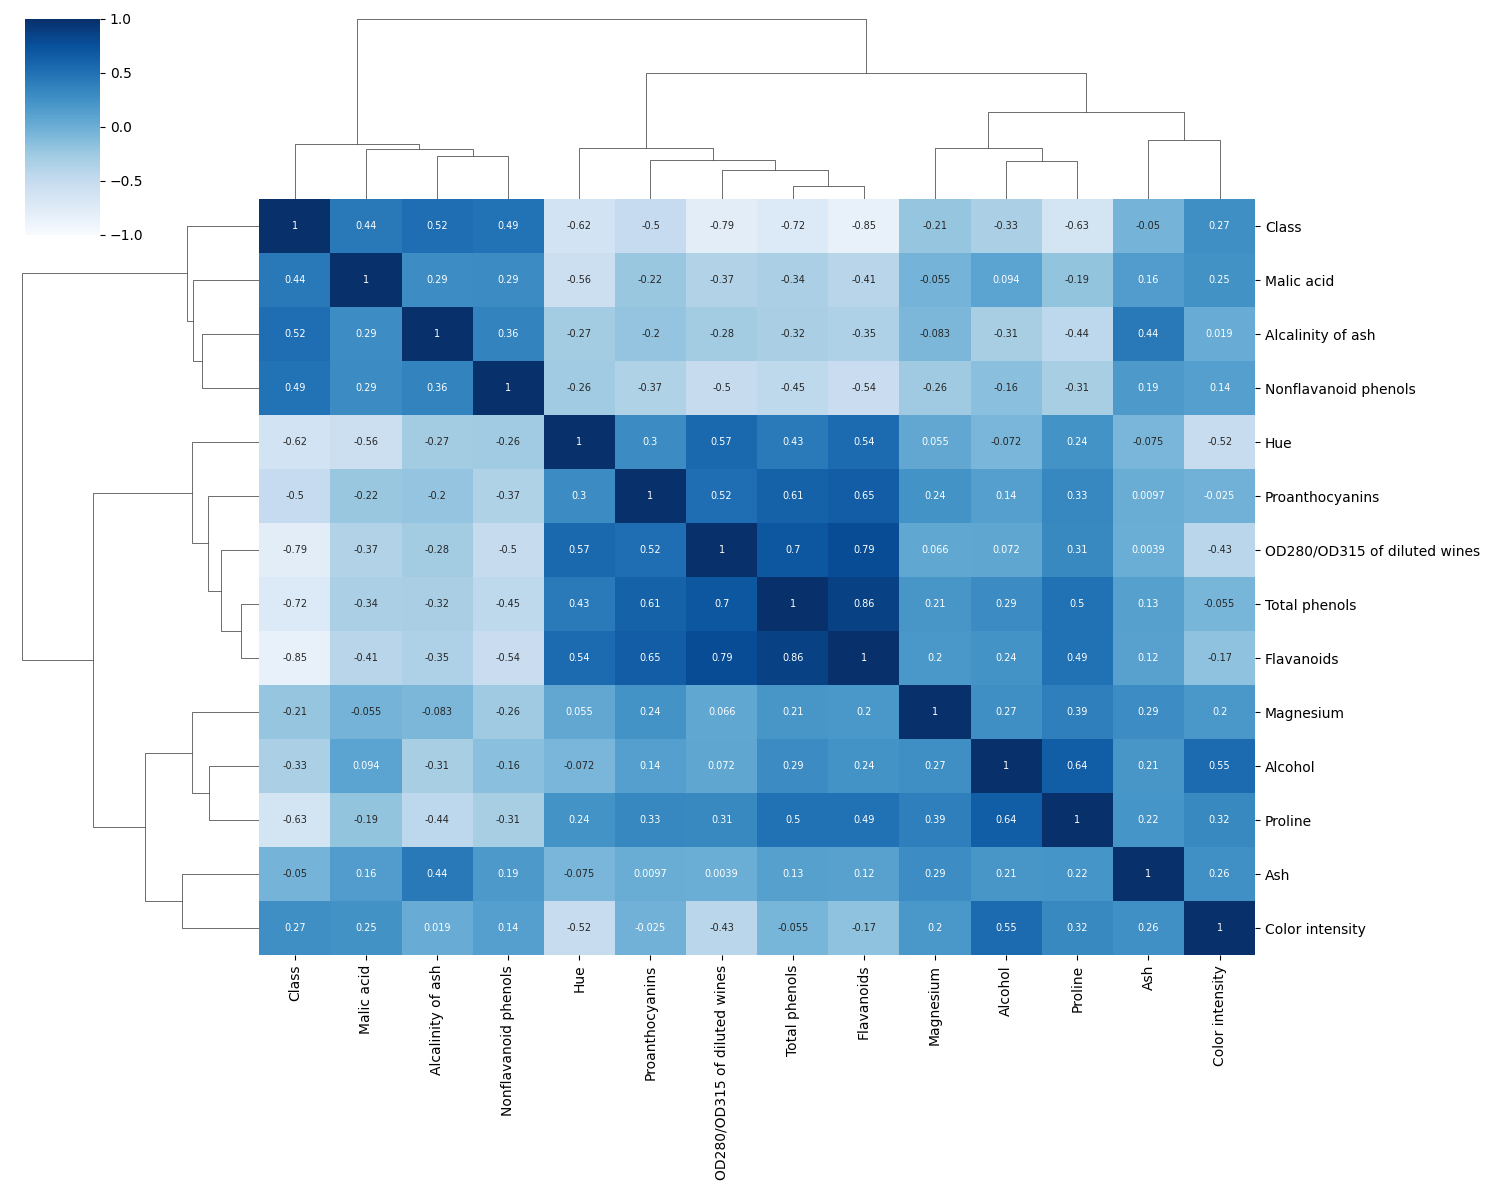

In [9]:
sns.clustermap(cor, method="complete", cmap='Blues', annot=True, 
               annot_kws={"size": 7}, vmin=-1, vmax=1, figsize=(15,12));

Removing random 8 sample to test after

In [10]:
num_random_rows = 8

random_rows_df = wine_df.sample(n=num_random_rows, random_state=rng)
df = wine_df.drop(random_rows_df.index)

#Reset index
df.reset_index(drop=True, inplace=True)
random_rows_df.reset_index(drop=True, inplace=True)

df.info()
random_rows_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 170 entries, 0 to 169
Data columns (total 14 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Class                         170 non-null    int64  
 1   Alcohol                       170 non-null    float64
 2   Malic acid                    170 non-null    float64
 3   Ash                           170 non-null    float64
 4   Alcalinity of ash             170 non-null    float64
 5   Magnesium                     170 non-null    int64  
 6   Total phenols                 170 non-null    float64
 7   Flavanoids                    170 non-null    float64
 8   Nonflavanoid phenols          170 non-null    float64
 9   Proanthocyanins               170 non-null    float64
 10  Color intensity               170 non-null    float64
 11  Hue                           170 non-null    float64
 12  OD280/OD315 of diluted wines  170 non-null    float64
 13  Proli

Split Dpendent and Independent Variables (x=data, y=target)

In [11]:
x = df.drop("Class", axis=1)
y = df["Class"]

x_random = random_rows_df.drop("Class", axis=1)
y_random = random_rows_df["Class"]

Testing isolated data

In [12]:
RF.fit(x,y)
predictions = RF.predict(x_random)
print(confusion_matrix(y_random,predictions))

NameError: name 'RF' is not defined

In [ ]:
#CasaSantos_df = pd.read_csv("DS\wine-tiago.csv")

#trash = CasaSantos_df

#predict_trash = RF.predict(trash)
#print(predict_trash)


In [ ]:
from sklearn.preprocessing import label_binarize
from sklearn.metrics import roc_curve, auc
from itertools import cycle

y_bin = label_binarize(y_res, classes=[1,2,3])
y_pred_bin = label_binarize(y_res_pred, classes=[1,2,3])
n_classes = y_bin.shape[1]

fpr = dict()
tpr = dict()
roc_auc = dict()

for i in range(n_classes):
    fpr[i], tpr[i], _ = roc_curve(y_bin[:, i], y_pred_bin[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])
colors = cycle(['blue', 'red', 'green'])
for i, color in zip(range(n_classes), colors):
    plt.plot(fpr[i], tpr[i], color=color,
             label='ROC curve of class {0} (area = {1:0.2f})'
             ''.format(i+1, roc_auc[i]),
             aa=True)

plt.axline((0, 0), slope=1, label='X=Y (area = 0.50)', aa=True)
plt.plot([0, 1], [0, 1], 'k--')
plt.xlim([-0.05, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Random Forest')
plt.legend(loc="lower right")
plt.show()

NameError: name 'y_res' is not defined

XGBoost 10 fold

In [ ]:
y_xgb = y-1
y_res_xgb = y_res-1

import xgboost as xgb
from sklearn.model_selection import GridSearchCV

param_grid = {
    'max_depth': [3, 5, 7],
    'learning_rate': [0.1, 0.01, 0.001],
    'subsample': [0.5, 0.7, 1]
}

xgb_model = xgb.XGBClassifier(random_state=rng)

grid_search = GridSearchCV(xgb_model, param_grid, cv=10, scoring='accuracy')

grid_search.fit(x, y_xgb)

# Print the best set of hyperparameters and the corresponding score
print("Hyperparameters: ", grid_search.best_params_)
print("Best score: ", grid_search.best_score_*100, "%")

Hyperparameters:  {'learning_rate': 0.1, 'max_depth': 3, 'subsample': 0.5}
Best score:  96.4705882352941 %
